# 연습

#### 패키지 불러오기

In [44]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt
import matplotlib

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# GridSearchCV : 최적의 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

# DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier

# export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz

In [45]:
# os 환경 설정 패키지
import os
# PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
# os.environ["PATH"] += os.pathsep + "~/opt/anaconda3/lib/python3.8/site-packages"

In [46]:
# 나눔 고딕 적용
matplotlib.rc("font", family = "NanumGOTHIC")

## 데이터 구성하기

In [47]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/HMEQ.csv', encoding='euc-kr')

# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)

# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: ds_hmeq.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw)

# 설명변수, 목표변수 데이터 지정
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"] 

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

In [48]:
df_raw_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808718,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [49]:
df_raw["JOB"].value_counts()

Other      1525
ProfExe     929
Office      623
Mgr         477
Self        130
Sales        64
Name: JOB, dtype: int64

In [50]:
# 더미 변수 결과 보기
df_raw["JOB"]
df_train_x

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,27600,103898,130784.0,11.000000,0,0.0,147.128398,0.0,29,42.009814,1,0,0,1,0,0,0,0
3314,30200,80951,116160.0,19.000000,4,0.0,130.360362,0.0,58,50.352999,1,0,0,0,0,1,0,0
93,5700,74172,79846.0,0.000000,0,0.0,157.009775,0.0,28,47.415229,1,0,0,0,0,1,0,0
1456,14900,22245,31531.0,7.000000,0,0.0,91.074218,0.0,16,21.620580,1,0,0,1,0,0,0,0
3327,30500,57516,103086.0,3.000000,0,0.0,166.199527,2.0,24,37.814089,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,28900,91683,127833.0,0.000000,1,0.0,187.242403,3.0,37,33.168757,1,0,0,0,0,1,0,0
3125,27100,20497,74244.0,9.130398,1,2.0,93.060343,1.0,25,27.361340,1,0,0,0,1,0,0,0
1318,14000,51721,61193.0,0.000000,0,0.0,186.999359,2.0,12,25.810011,1,0,0,0,1,0,0,0
723,10800,67740,108135.0,11.000000,0,0.0,163.273832,1.0,12,38.383498,1,0,0,1,0,0,0,0


## 모델 생성

#### 기본 옵션으로 트리 생성

In [51]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.932


In [52]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

#### max_depth: 최대 깊이 변경에 따른 정확도 변화

In [53]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]
para_depth2 = [depth for depth in [5, 10, 15, 20]]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
print(para_depth)
print(para_depth2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[5, 10, 15, 20]


In [54]:
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


In [55]:
# df_accuracy_depth = pd.DataFrame()
# df_accuracy_depth["Depth"] = para_depth2
# df_accuracy_depth["TrainAccuracy"] = train_accuracy
# df_accuracy_depth["TestAccuracy"] = test_accuracy
# df_accuracy_depth.round(3)

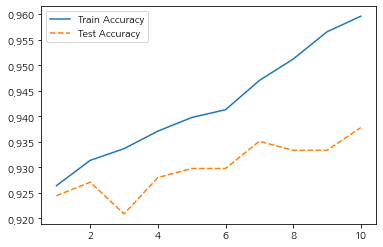

In [56]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [57]:
# 임의로 지정
max_depth = 4

#### 깊이(max_depth)에 따른 차이 변화(깊이 4 vs 6)

In [58]:
df_train_y.value_counts()

0    2382
1     241
Name: BAD, dtype: int64

In [59]:
# !pip install graphviz

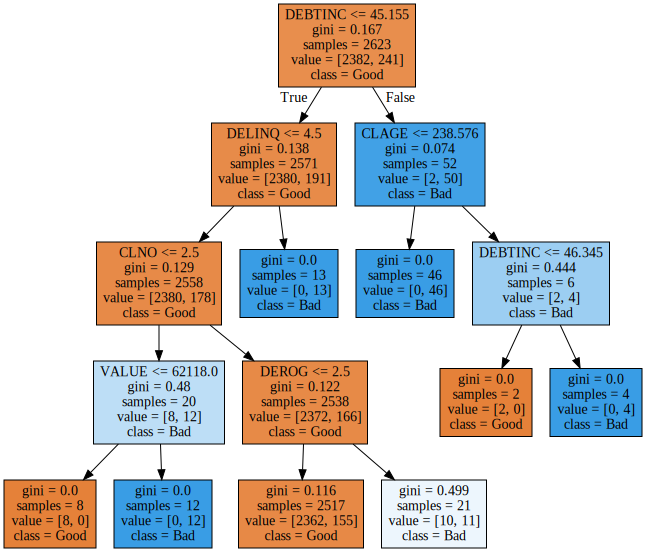

In [60]:
# 변수명
v_feature_names = df_train_x.columns

# 깊이가 4인 모델
tree_depth4 = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_depth4.fit(df_train_x, df_train_y)

# 트리 모델을 tree_depth4.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)
export_graphviz(tree_depth4, out_file = "tree_depth4.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

# graphviz를 이용해 트리 모델 시각화
with open("tree_depth4.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

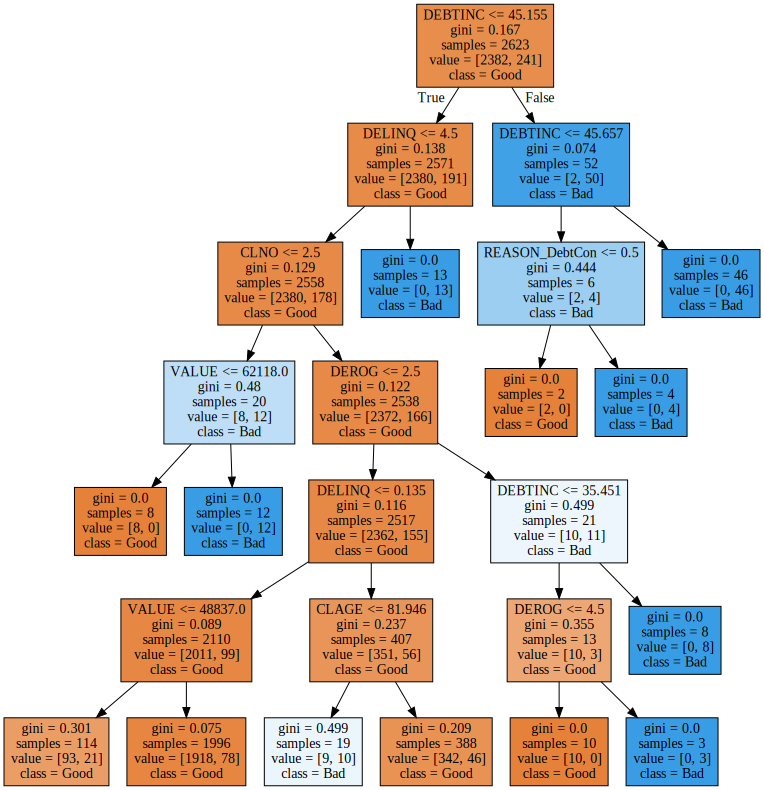

In [61]:
# 깊이가 6인 모델
tree_depth6 = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
tree_depth6.fit(df_train_x, df_train_y)
export_graphviz(tree_depth6, out_file="tree_depth6.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)
with open("tree_depth6.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### min_samples_split: 분할하기 위한 노드의 최소 샘플 수

In [62]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,0.937,0.928
1,3,0.937,0.928
2,4,0.937,0.928
3,5,0.937,0.928
4,6,0.937,0.928
5,7,0.936,0.928
6,8,0.936,0.928
7,9,0.936,0.928
8,10,0.936,0.928


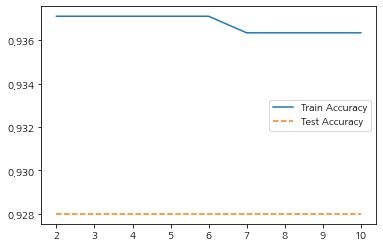

In [63]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

##### 분리 노드의 최소 샘플 수(min_samples_split)에 따른 차이 변화

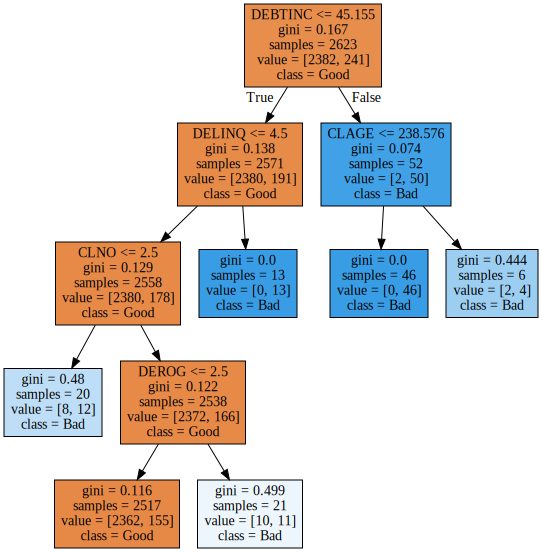

In [64]:
# 분리 노드의 최소 샘플 수가 50인 모델
tree_split50 = DecisionTreeClassifier(max_depth = 4, min_samples_split = 50, random_state=1234)
tree_split50.fit(df_train_x, df_train_y)

export_graphviz(tree_split50, out_file="tree_split50.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

with open("tree_split50.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

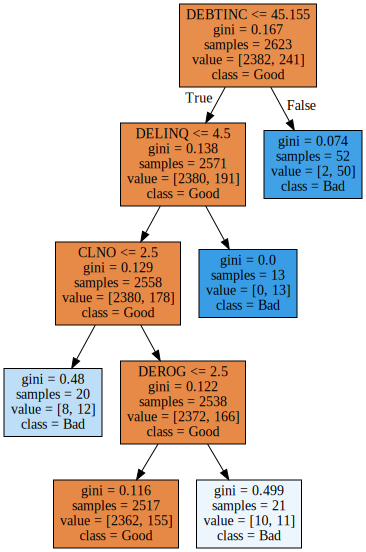

In [65]:
# 분리 노드의 최소 샘플 수가 100인 모델
tree_split100 = DecisionTreeClassifier(max_depth = 4, min_samples_split=100, random_state=1234)
tree_split100.fit(df_train_x, df_train_y)

export_graphviz(tree_split100, out_file="tree_split100.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

with open("tree_split100.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### min_samples_leaf: 잎사귀 노드의 샘플 수 제한

In [66]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.936,0.928
1,20,0.932,0.919
2,30,0.930,0.925
3,40,0.926,0.924
4,50,0.926,0.924
5,60,0.925,0.926
6,70,0.925,0.925
7,80,0.924,0.924
8,90,0.921,0.921
9,100,0.918,0.918


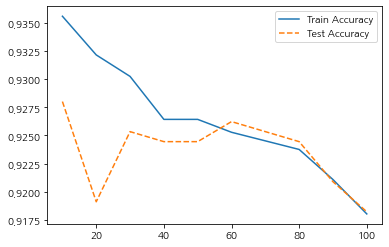

In [67]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### 잎사귀 노드의 샘플 수(min_samples_leaf)를 변경하면서 모델의 시각화 결과를 확인

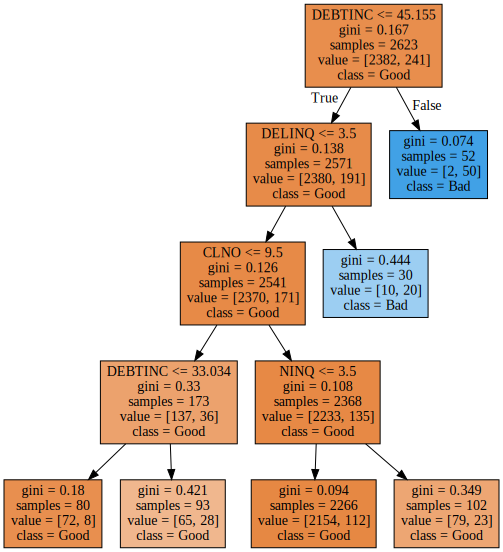

In [68]:
# 잎사귀의 샘플 수가 30인 모델
tree_leaf30 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 30, random_state=1234)
tree_leaf30.fit(df_train_x, df_train_y)

export_graphviz(tree_leaf30, out_file="tree_leaf30.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

with open("tree_leaf30.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

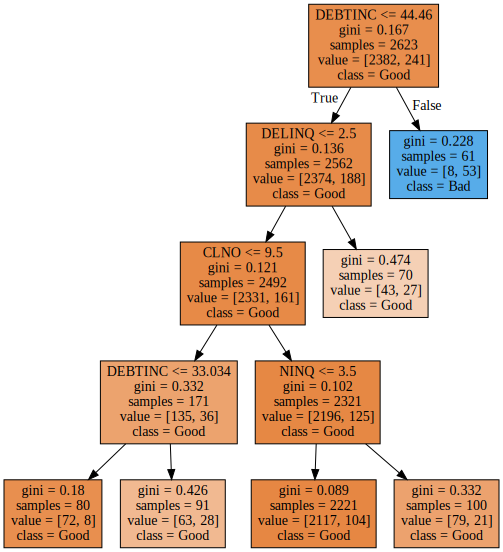

In [69]:
# 잎사귀의 샘플 수가 60인 모델
tree_leaf60 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 60, random_state=1234)
tree_leaf60.fit(df_train_x, df_train_y)

export_graphviz(tree_leaf60, out_file="tree_leaf60.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

with open("tree_leaf60.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최종 모델 선정 / 시각화

#### 최종 모델

In [70]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 30)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)

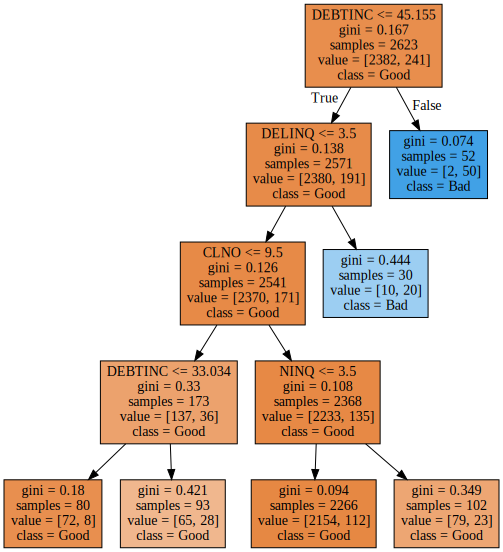

In [71]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [72]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.925

Confusion matrix: 
[[1017    4]
 [  80   24]]


#### 설명변수 중요도

In [73]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.707
5,DELINQ,0.180
8,CLNO,0.062
7,NINQ,0.051
11,REASON_HomeImp,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000
13,JOB_Office,0.000
12,JOB_Mgr,0.000


Text(0, 0.5, '설명변수')

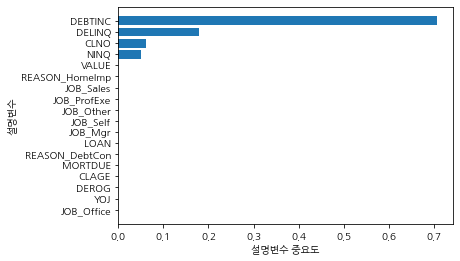

In [74]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [75]:
estimator = DecisionTreeClassifier()

# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}

# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

best parameter: 
{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}

best score: 
0.93
